# Explorando bases de textos anotados

[Voltar ao Índice](00_indice.ipynb)

Aqui exploramos os corpus (conjuntos de textos) fornecidos por Fortuna _et al._ (2019) e Pelle & Moreira (2017), para entendermos o significado das colunas, os tipos de dados, etc.

## Explorando dados hierárquicos da Paula Fortuna

Fonte: <https://github.com/paulafortuna/Portuguese-Hate-Speech-Dataset>

In [8]:
import pandas as pd
from pathlib import Path

import src.xavy.explore as xe
import src.xavy.dataframes as xd

### Carregando os dados

In [10]:
hierarchy_df = pd.read_csv(Path('../dados/brutos/Portuguese-Hate-Speech-Dataset/2019-05-28_portuguese_hate_speech_hierarchical_classification.csv'))

In [11]:
hierarchy_df.head()

,text,Hate.speech,Sexism,Body,Racism,Ideology,Homophobia,Origin,Religion,Health,...,Thin.women,Arabic,East.europeans,Africans,South.Americans,Brazilians,Migrants,Homossexuals,Thin.people,Ageing
0,"""não come mel, morde marimbondo""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"não tem pinto, tem orgulho !",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Não vê essa merda de Crepúsculo! Pra isso temo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"não da tapa na bundinha, da cotovelada nas cos...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,o diminutivo INHO não acompanha a trajetória d...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Características básicas

In [12]:
len(hierarchy_df)

5668

In [13]:
xe.checkMissing(hierarchy_df)

Colunas com valores faltantes:
Empty DataFrame
Columns: [coluna, N, %]
Index: []


In [14]:
xe.mapUnique(hierarchy_df)


text: 5668 unique values.
(sample) "De erro em erro, vai-se descobrindo toda a verdade."
#MulherDeVerdade,  @CapitalismoOP @VitriaO98675664 eu tinha esquecido, não tenho cachorro. .... Kkk,  @GABRIELPlNHEIRO 
Tem que mostrar essa matéria para a @veramagalhaes,  Adicionei um vídeo a uma lista de reprodução do @YouTube https://t.co/tUcZqbRpPN Angola & China vs EUA (A verdade que você não,  CULPA DO CAPITALISMO OPRESSOR E DO TRUMP by esquerdista https://t.co/fvJ2dKChRX,  Com meu pai Whashington Lobo Franco.Amoooo. https://t.co/R2dpAnNO0N,  Como ser feminista:
Ser feia e gorda
Pagar peitinho em passeata
Ser peluda
Odiar homens
E achar q isso fará diferença no mundo.,  Conservadores são os melhores. https://t.co/SQkVtDExAt,  O repórter @pvedova lembra dos "crimes de ódio" cometidos contra imigrantes mas esquece dos números de crimes cometidos PELOS imigrantes.,  Ontem batemos o recorde de utilização da palavra "nabo" na TV Portuguesa.
Não acreditam? https://t.co/MGGG26aPJi
#OverdoseDeToure

In [15]:
hierarchy_df['Hate.speech'].value_counts()

0    4440
1    1228
Name: Hate.speech, dtype: int64

### Exemplos de classificação

In [16]:
hierarchy_df.columns

Index(['text', 'Hate.speech', 'Sexism', 'Body', 'Racism', 'Ideology',
       'Homophobia', 'Origin', 'Religion', 'Health', 'OtherLifestyle',
       'Aborting.women', 'Agnostic', 'Argentines', 'Asians', 'Autists',
       'Black.Women', 'Blond.women', 'Brazilians.women', 'Chinese',
       'Criminals', 'Egyptians', 'Fat.people', 'Football.players.women',
       'Gamers', 'Homeless', 'Homeless.women', 'Indigenous', 'Iranians',
       'Japaneses', 'Jews', 'Jornalists', 'Latins', 'Left.wing.ideology',
       'Men.Feminists', 'Mexicans', 'Muslims.women', 'Nordestines',
       'Old.people', 'Polyamorous', 'Poor.people', 'Rural.people', 'Russians',
       'Sertanejos', 'Street.artist', 'Ucranians', 'Vegetarians',
       'White.people', 'Young.people', 'Old.women', 'Ugly.people',
       'Venezuelans', 'Angolans', 'Black.people', 'Disabled.people',
       'Fat.women', 'Feminists', 'Gays', 'Immigrants', 'Islamists', 'Lesbians',
       'Men', 'Muslims', 'Refugees', 'Trans.women', 'Travestis', 'Wome

In [17]:
col = 'Sexism' 

# Textos com violência:
print(xe.bold('Violência'))
xd.print_string_series(hierarchy_df.loc[hierarchy_df[col] == 1, 'text'].sample(5))
print('')
# Textos com violência (tipicamente xingamentos):
print(xe.bold('Não-Violência'))
xd.print_string_series(hierarchy_df.loc[hierarchy_df[col] == 0, 'text'].sample(5))

Violência
348: "Cem homens podem formar um acampamento, mas é preciso uma mulher para se fazer um lar." #MulherDeVerdade
25: Se vc tem um namorado que diz que não olha para as gostosas e que
não bate umazinha nunca! FUJA: é uma franguinha sem caráter !!!
4584: @GiovannAmanda A maioria dos argumentos dos fans do Bolsonaro é que toda feminista é feia, cabeluda, gorda etc
336: "Há homens que têm patroa.
Há homens que têm mulher.
E há mulheres que escolhem o que querem ser." #MulherDeVerdade
4639: @larissasandy18 fui fazer luzes e a burra da mulher fez merda... Tá horrível

Não-Violência
1035: E metendo a vara nela a distância chega a ser negativa de tão perto. Pense nisso https://t.co/hFreY2Quc6
3253: Soube agora: O mesmo embaixador russo que encontrou com Jeff Sessions visitou Obama na Casa Branca 22 vezes. 4 veze _ https://t.co/JqepljsE3w
4218: RT @GABRIELPlNHEIRO: Foi assaltar e levou bala https://t.co/wgsMhOtxun
5292: Ai q gostoso a Cléo Pires fumando um e publicando na NET pq o privi

In [18]:
(hierarchy_df.loc[(hierarchy_df.iloc[:, 2:] == 1).any(axis=1), 'Hate.speech'] == 1).all()

True

## Explorando dados binários da Paula Fortuna

Fonte: <https://github.com/paulafortuna/Portuguese-Hate-Speech-Dataset>

In [21]:
import pandas as pd

import src.xavy.explore as xe
import src.xavy.dataframes as xd

### Carregando os dados

In [24]:
fortuna_df = pd.read_csv(Path('../dados/brutos/Portuguese-Hate-Speech-Dataset/2019-05-28_portuguese_hate_speech_binary_classification.csv'))

In [25]:
fortuna_df.head()

,text,hatespeech_comb,hatespeech_G1,annotator_G1,hatespeech_G2,annotator_G2,hatespeech_G3,annotator_G3
0,@__andrea__b \nO cara vive em outro mundo\nNão...,1,1,A,1.0,V,0,E
1,@_carmeloneto Estes incompetentes não cuidam n...,0,1,D,0.0,V,0,C
2,@_carmeloneto \nOs 'cumpanhero' quebraram toda...,0,1,A,0.0,B,0,E
3,@_GlitteryKisses é isso não conseguem pensar n...,0,0,C,0.0,V,0,D
4,@_iglira bom dia macaco branco haha,1,0,A,1.0,I,1,E


### Verificando textos com consenso

In [26]:
consenso_df = fortuna_df.loc[(fortuna_df['hatespeech_G1'] == 1) & (fortuna_df['hatespeech_G2'] == 1) & (fortuna_df['hatespeech_G3'] == 1)] 
len(consenso_df)

507

In [27]:
xd.print_string_series(consenso_df['text'].sample(5))

2987: Nós heteros, que AINDA somos maioria, devemos nos unir contra a ditadura da minoria. Abaixo a #heterofobia !!!!
1102: Deu acidente aqui na esquina de casa e só da pra ouvir os pedreiros gritando chamando a mulher de burra kkkkkkk
5605: ~*~*~*~ vOcÊ é NeGrA mAs AtÉ qUe é BoNiTa ~*~*~*~
615: @bbb os sem graças q vao passar a festa toda falando mal dos outros e roberta gorda feia fazendo caretas kkkkk os eliminadoa do bbb
4145: RT @devilshug: meudeus que FARDO deve ser ter nascido hétero e branco aff que tragédia grega isso


In [28]:
limpo_df = fortuna_df.loc[(fortuna_df['hatespeech_G1'] == 0) & (fortuna_df['hatespeech_G2'] == 0) & (fortuna_df['hatespeech_G3'] == 0)]
len(limpo_df)

1957

In [29]:
xd.print_string_series(limpo_df['text'].sample(5))

4394: RT @JanainaDoBrasil: 17- precisamos, mais que combater a corrupção, mudar essa mentalidade.
4944: RT @vitormramalho: Concorda com a saída de Portugal da União Europeia https://t.co/BxTLRTc67l
2707: @minycalegari tá exagerando já
3018: @OAngelo82 @odedonafrida Ia puxar do emoji do cão triste. Não foi preciso
1719: Feia ou bonita , gorda ou magra seja como for mulher nasceu para ser respeitada . Feliz dia da Mulher para todas nós


### Características básicas

In [30]:
len(fortuna_df)

5670

In [31]:
xe.checkMissing(fortuna_df)

Colunas com valores faltantes:
          coluna    N     %
4  hatespeech_G2  2.0  0.04


In [32]:
xe.mapUnique(fortuna_df)


text: 5666 unique values.
(sample) #Extra Próxima novela das 9,abordará transgêneros, desde a infância. Lembre-se que a associação Americana de... https://t.co/9cQuI5EmJc,  #PQMulher q discorda do feminismo é burra. A liberdade da mulher acaba aí com as manax https://t.co/WCrmRX3YOo,  'Diz produtora IRANIANA'. Não pode ser séria essa notícia... 
Certeza q p essa mulher, jogar um Boeing contra um p _ https://t.co/TOy463lsYd,  'No livro best-seller do New York Times “Má-feminista:  ensaios provocativos de uma ativista desastrosa”,... https://t.co/ZJiFNueXf5,  @Liechoscki ah? Só não tenho vontade de ter...,  @agnaldoregojr 
2) O fato de o cidadão de bem passar a portar uma arma não o transformará em bandido.
Crime é questão de índole!,  Bastaram 4 anos pra 'mudança' acontecer. https://t.co/09a2spa316,  Bom dia sapatão,  Cafagestes de Faro e Odemira (São Teotónio),no próximo fds,chegou finalmente a vossa vez.
Bilhetes nos sitíos do co _ https://t.co/l2NNkNmjIh,  Este ano vamos comemorar o

In [33]:
fortuna_df['hatespeech_comb'].value_counts()

0    3882
1    1788
Name: hatespeech_comb, dtype: int64

### Exemplos de classificação

In [34]:
# Textos com violência:
xd.print_string_series(fortuna_df.loc[fortuna_df['hatespeech_comb'] == 1, 'text'].sample(5))

2507: mais sapatão que isso, só isso https://t.co/LadAgP8NRx
2795: nada contra negros mas nada contra usar desodorante tb ne
2731: @msantoro1978 assim como todo refugiado sírio é um terrorista infiltrado, todo venezuelano é um chavista.
Assim será sob o temerismo.
392: 'A mulher tem que ser o que ela quiser'
MAS NAO USA DECOTE SUA VADIA NAO PODE, TEMOS QUE ANDAR TODAS DE BURCA
4460: RT @jpintocoelho60: Ameaça? Ridículo! Estão é mal habituados: podem dizer o que querem de nós, mas vêem ameaças onde elas não existem.
Que _


In [35]:
# Textos com violência (tipicamente xingamentos):
xd.print_string_series(fortuna_df.loc[fortuna_df['hatespeech_comb'] == 0, 'text'].sample(5))

5375: Top 3 Filmes de todos os tempos:
-De volta para o futuro 2
-O Poderoso Chefão 1
-Curtindo a vida adoidado
943: Como vc se sente @lolaescreva roubando o meu dinheiro d'um país que não tem leito em hospital direito? Sua canalha
3281: Os responsáveis por isso #NaoAOLimiteDeInternet https://t.co/ZXYaExw2RM
3094: O fascismo da esquerda em dois prints @leandraleal https://t.co/G6n9BPPcwb
2263: #JesusEstáVoltando
DUVIDO... NO MÁXIMO ELE MANDA O METEORO. https://t.co/oTPUtLfSsg


### Concordância entre anotadores

In [36]:
annotations = ['hatespeech_G1', 'hatespeech_G2', 'hatespeech_G3']
fortuna_df[annotations].dropna().corr()

,hatespeech_G1,hatespeech_G2,hatespeech_G3
hatespeech_G1,1.000000,0.357873,0.204126
hatespeech_G2,0.357873,1.000000,0.264503
hatespeech_G3,0.204126,0.264503,1.000000


## Overlap do binary e hierarchy da Paula Fortuna

Vemos que o conteúdo (em termos dos textos) dos dois datasets são os mesmos. As supostas diferenças são de pequenas alterações de formatação, basicamente.

In [37]:
fortuna_plus   = pd.Series(list(set(fortuna_df['text']) - set(hierarchy_df['text'])), name='fortuna_plus')
hierarchy_plus = pd.Series(list(set(hierarchy_df['text']) - set(fortuna_df['text'])), name='hierarchy_plus')

In [38]:
xd.print_string_series(hierarchy_plus.sample(5))

104: @fcancio 
Tão "tolerantes" o democratas, mas não sabem perder. Os hipócritas ressabiados vão esgotar o medicamento https://t.co/sEsLcWaILG
414: @renatuuus Amore Ajuda a divulgar: O primeiro livro da @melaineribeiro "A ESCRITORA E O MUSICO" www.aescritoraeomusico.blogspot.com
534: não ouço falar nada de liechtenstein 
outro país que não aceitou "refugiados", manteve a id cultural e nacional, frio e é monarquia. foda.
670: Vá lá, hoje o programa "Prós e Contras" da @rtppt, sobre Eutanásia, não foi, como habitualmente, prós-e-prós, e até foi interessante,
186: "religiões africanas" falou bem!
Esse seu argumento só consolida o que tenho dito, ora!!! https://t.co/pOAw5pv0VX


In [39]:
xd.print_string_series(fortuna_plus.loc[fortuna_plus.str.contains('canalhice', case=False)])

175: 'até pouco tempo atrás'  Que canalhice!!!!
O retardado compara o Cristianismo da idade média com o islamismo de 201 _ https://t.co/6pcTiHG7G5
313: Olha a canalhice na chamada! Como se a 'culpa' fosse da lei, e não dos criminosos! https://t.co/9XX51a28Tg


## Explorando dados do OffComBR

Fonte: <https://github.com/rogersdepelle/OffComBR>

In [41]:
import pandas as pd

import src.xavy.explore as xe
import src.xavy.dataframes as xd

### Carregando os dados

In [42]:
offcombr_df = pd.read_csv(Path('../dados/brutos/OffComBR/OffComBR2.arff'), skiprows=8, names=['label','text'], quotechar="'")

### Características básicas

In [43]:
xd.print_string_series(offcombr_df['text'].sample(10))

459: Nosso alvo e Nacional e nao municipalaonde todos se DOBRARAO
109: E preciso reduzir e muito O custo Brasilia   Reducao de privilegiosreducao numero de deputados e senadoresreduzir numero de instancias recursais no judiciario    
997: Lizzie come bosta
337: sabe o que ela tem mais que nos Ela tem mais e QSF
838: Reforma estrutural no seu rbbono meu nao
1034: P I R A N H A
603: Esses fans e torcedores do CR e Real Madrid sao uma piada Raca nojenta 
546: Se depender do STF Manda soltar todo mundoE com aposentadoria Ainda por cima
810: Esse ai senta na boneca
1004: Bruno cria um cerebro e pensa


In [44]:
len(offcombr_df)

1250

In [45]:
xe.checkMissing(offcombr_df)

Colunas com valores faltantes:
Empty DataFrame
Columns: [coluna, N, %]
Index: []


In [46]:
xe.mapUnique(offcombr_df)


label: 2 unique values.
no,  yes

text: 1243 unique values.
(sample)  gols em  jogos oficiais media de  Melhor do mundo,  Andre noiado ver se diminue o fumo Ta dificil,  Boca de cloaca,  Cade Sergio moro podia pegar essa de sobremesa ,  ELENCO GRANDE E DE POUQUISSIMA QUALIDADE ,  Esse Tabare e o tipico bolivariano light se e que isso existe,  Felipe massa ja vai se aposentar O que sera dessa selecao ,  Fiquei chocado com essa noticia,  Mano na boa quase que ele faz um hattrick Solange So faltou  penaltis,  Os netos que devem ter vergonha dele,  Pior que acho que nao so a boca que e mole Mais feio que este so o Cervero,  Pobre BURRO neque apoia a direita,  SAO QUASE  SO PARA PAGAR JUROS DA  DIVIDA Uma vez que a reforma tributaria e PRINCIPALMENTE A REFORMA DO SISTEMA DA DIVIDA PUBLICA ninguem  se mexe para fazer  ja que contraria os poderosos que emprestam dinheiro ao Brasil alguns ligados ao FMI inclusive  mais facil por a culpa no trabalhador e nos programas sociais que nao represent

In [47]:
offcombr_df['label'].value_counts()

no     831
yes    419
Name: label, dtype: int64

### Exemplos de classificação

In [48]:
# Textos com violência (tipicamente xingamentos):
xd.print_string_series(offcombr_df.loc[offcombr_df['label'] == 'yes', 'text'].sample(5))

1113: Lurdinha burra
959: e um monte de bosta mesmo no minimo e do norte ou nordeste que trabalhar que e bom nao trabalha vive do bolsa familia por isso vai votar no luladrao
194: Demente total 
1234: Ele chamava pra atras da escola e sentava nos garotos kkkk
1231: Em resumo deve ser um idiota


In [49]:
# Textos sem violência:
xd.print_string_series(offcombr_df.loc[offcombr_df['label'] == 'no', 'text'].sample(5))

717: SE ZE CONTINUAR NAO VAMOS GANHAR NADAEM HORAS DECISIVAS SEMPRE ERRA
806: No Nordeste acontece de tudo 
1048: Esse MITO sabe tudo de futebol 
308: O asilo e pra ela mesmo ela nao esta nem ai para excompanheiro de palanque
57: verdade vamos ser compreensivos 


## Estimando a significância de um Fleiss's kappa

In [51]:
import numpy as np
import matplotlib.pyplot as pl

import src.xavy.stats as xs
import src.xavy.explore as xe

### Classificação binária da Paula Fortuna

In [52]:
xe.checkMissing(fortuna_df)

Colunas com valores faltantes:
          coluna    N     %
4  hatespeech_G2  2.0  0.04


In [53]:
test_df = fortuna_df[['hatespeech_G1', 'hatespeech_G2', 'hatespeech_G3']].copy()
test_df['hatespeech_G2'] = test_df['hatespeech_G2'].fillna(0).astype(int)

In [54]:
# Valor esperado é de 0.17:
xs.fleiss_kappa(test_df.values, n_votes_per_class=False)

0.174914249592265

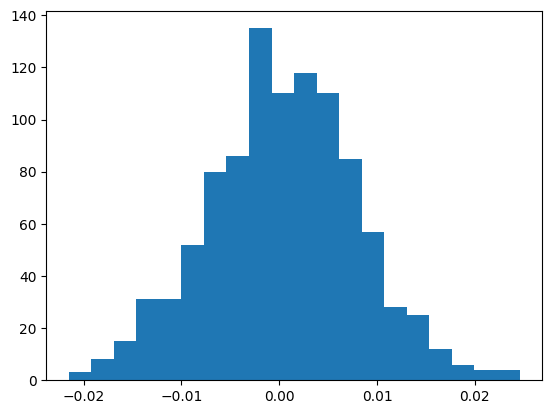

In [55]:
# Criando amostras aleatórias uniformes:
N_samples = 1000
kappas = []
for _ in range(N_samples):
    X = np.random.randint(0, 2, (len(test_df), 3))
    kappas.append(xs.fleiss_kappa(X, n_votes_per_class=False))

# Histograma do Fleiss' Kappa:
pl.hist(kappas, bins=20)
pl.show()

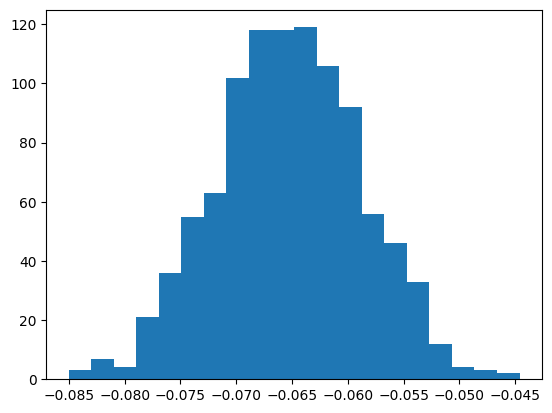

In [56]:
# Criando amostras embaralhadas:
N_samples = 1000
kappas = []
for _ in range(N_samples):
    random_df = pd.DataFrame()
    random_df[1] = test_df['hatespeech_G1']
    random_df[2] = xs.shuffle_data(test_df['hatespeech_G2'])
    random_df[3] = xs.shuffle_data(test_df['hatespeech_G3'])
    kappas.append(xs.fleiss_kappa(random_df.values, n_votes_per_class=False))
    
# Histograma do Fleiss' Kappa:
pl.hist(kappas, bins=20)
pl.show()

### Gerando votos aleatórios uniformes

In [57]:
Na = 3 # Número de anotadores
Nk = 2 # Númetro de classes
Nn = 10 # Número de exemplos

In [58]:
# Cada coluna é a classificação de um anotador.
# Cada linha é uma instância.
# Os valores são os índices da classe.
annotation_matrix = np.random.randint(0, Nk, (Nn, Na))

### Testando função Kappa

In [60]:
# Resultado esperado, segundo a wikipedia (https://en.wikipedia.org/wiki/Fleiss%27_kappa): 0.210
X_test = pd.read_csv(Path('../dados/brutos/aux/fleiss_kappa_test_input.csv'), names=list(range(1,6))).values
xs.fleiss_kappa(X_test)

0.20993070442195522